In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def circleArea(d):
    return 1/4 * np.pi * d ** 2
    

<h1> Task A</h1>Constant head test in the laboratory
A constant head test is performed in the laboratory on a sandy sample. The dimensions of the sample are:
diameter D=8cm, height L=15cm. The cumulative mass of water collected with time during the test
under a constant hydraulic head difference ∆ h=0.5m is reported in Figure 1.
Task 1
Estimate the hydraulic conductivity of the sample.

In [3]:
#calculates discharge from experiment data (mass over time) by 'least-squaring'
def calculateConstantHeadDischarge(tv, mv):
    A = np.vstack([tv, np.zeros(len(tv))]).T

    mass_discharge = np.linalg.lstsq(A, mv)[0][0]

    print('Estimated water mass discharge [g/s]:', mass_discharge)
    print('Or [m^3/s]', mass_discharge * 1e-6)
    tv = np.linspace(0, 150, 10)


    labels = ["experiment data", "estimated data"]
    plt.plot(time_v, mass_v, 'bo' , label = "experiment data")
    plt.plot(tv, tv * mass_discharge, 'r--', label = "estimated data")
    plt.title('Cumulative amount of water over time')
    plt.legend(labels=labels)
    plt.ylabel('Mass [g]')
    plt.xlabel('Time [s]')
    
    return mass_discharge * 1e-6

#Calculates conductivity from Darcy's Law Q = K * ds / dh * A -> K = Q / a * dh / ds
def calculateConductivity(area, discharge, ds, dh):
    return discharge / area * ds / dh
    

C:\Users\Arseniy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Estimated water mass discharge [g/s]: 0.8169444444444444
Or [m^3/s] 8.169444444444444e-07
Sample conductivity: 4.875777996179835e-05


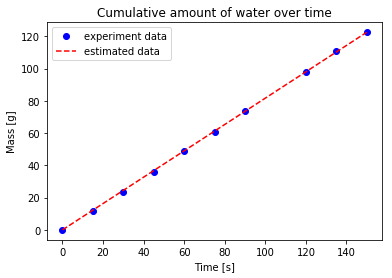

In [4]:
D = 0.08
ds = 0.15
dh = 0.5

mass_v = np.array(
    [0, 12, 23.4, 36.1, 48.8, 60.8, 73.7, 98.0, 111.1, 122.5])
time_v = np.array(
    [0, 15, 30, 45, 60, 75, 90, 120, 135, 150])

discharge = calculateConstantHeadDischarge(time_v, mass_v)
conductivity = calculateConductivity(circleArea(D), discharge, ds, dh)

print('Sample conductivity:', conductivity)


Plot the total head, the pressure head and the elevation head as a function of height along the sample.

In [7]:
#Plots total, pressure and elevation heads
def plotHeads(height, pressure_h, elevation_h):
    
    labels = ['pressure head', 'elevation head', 'total head']
    plt.plot(pressure_h, height, 'blue', label=labels[0])
    plt.plot(elevation_h, height, 'black' ,label=labels[1])
    plt.plot(pressure_h + elevation_h, height, 'r--', label=labels[2])
    plt.ylabel('Height [m]')
    plt.xlabel('Head [m]')
    plt.legend(labels = labels)
    plt.grid(True)
    plt.title('Heads vs Height plot')
    

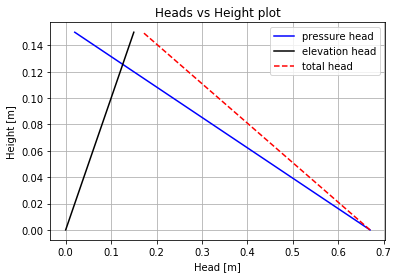

In [8]:
dx = 0.02
dh = 0.5
L = 0.15

height = np.linspace(0, L, 100)
elevation_h = height[:]
pressure_h = np.linspace(dx + dh + L, dx, 100)
plotHeads(height, pressure_h, elevation_h)

<h1>Task B </h1>
A falling head test is performed in the laboratory on a silty sample. The dimensions of the sample are:
diameter D=8cm, height L=15cm. The diameter of the burette is d=1cm The evolution of the water
level in the burette during time h (t ) is reported in Figure 2

In [19]:
#Calculating conductivity from the falling head experiment data
# Fritts, Chapter 3, eq. 3.33
# K = a/A * L / (t1 - t0) * ln(dh0/dh1) or
# (K * A / a / L) * (t1 - t0) = (ln(dh0) - ln(dh1)) -> a * x = y
# the value of (K * A / a / L) is found by least squaring 
# and by knowing A, a and L the value of K can be deducted
def calculateVariableHeadConductivity(time_v, dh_v, A, a, L):
    dif_t = time_v[1:] - time_v[:-1]
    log_dh = np.log(dh_v)
    dif_log_dh = log_dh[1:] - log_dh[:-1]

    matA = np.vstack([dif_t, np.zeros(len(dif_t))]).T

    coef = np.linalg.lstsq(matA, dif_log_dh)[0][0]
    
    K = coef / A * a * L
    
    labels = ['experiment data', 'estimated data']
    plt.plot(dif_t, dif_log_dh, 'bo', label = labels[0])
    plt.plot(dif_t, dif_t * coef, 'r--', label = labels[1])
    plt.legend(labels = labels)
    plt.title('$t\Delta$ vs $ln(dh)\Delta$')
    plt.xlabel('$t\Delta$')
    plt.ylabel('$ln(dh)\Delta$')
    
    return K
    

Sample conductivity: -1.1381401244132417e-09


C:\Users\Arseniy\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


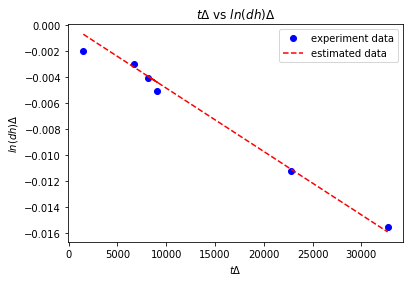

In [23]:
L = 0.15
d = 0.01
D = 0.08

time_v = np.array(
    [0, 1500, 8160, 17220, 25320, 48120, 80820])
dh_v = np.array(
    [49.90, 49.80, 49.65, 49.40, 49.20, 48.65, 47.90])
print('Sample conductivity:', calculateVariableHeadConductivity(time_v, dh_v, circleArea(D), circleArea(d), L))

Plot the total head, the pressure head and the elevation head as a function of height along the sample.

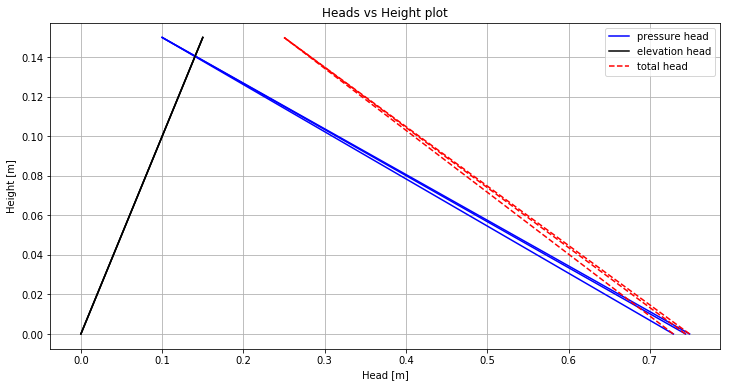

In [11]:
dx = 0.1
L = 0.15

plt.figure(figsize=(12,6))
for dh in dh_v[0::3]:
    height = np.linspace(0, L, 100)
    elevation_h = height[:]
    pressure_h = np.linspace(dx + dh + L, dx, 100)
    plotHeads(height, pressure_h, elevation_h)

<h1>Task C.</h1> Average hydraulic conductivity
Consider the stratified soil profile in Figure 3 composed by layers of silt with think clay lens in between. 


In [12]:
#Implementation of general approach to calculate K values in x and z directions
#Input: N x 3 matrix. Each row describes a layer.
#First column - thicknes, second column - Kx value, third - Kz
#equation 3.18 & 3.22
def calculateAverageConductivities(layers):
    
    total_thickness = np.sum(layers[:, 0])
    
    Kx = np.sum(layers[:, 0] * layers[:, 1]) / total_thickness
    Kz = total_thickness / np.sum(layers[:, 0] / layers[:, 2])
    
    return Kx, Kz
    
    

In [13]:
#example 3.7
layers = np.array(
    [[5, 2, 2],
    [2, 0.01, 0.01],
    [4, 6, 6]])

Kx, Kz  = calculateAverageConductivities(layers)
print(Kx, Kz)

3.0927272727272723 0.05414273995077933
